![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Authors:** Marina Saito
***

## Overview

Microsoft expressed a desire to create feature films and requested recommendations on the type of movie that would be most profitable and therefore worthwhile for Microsoft to create.  To do this, I looked at data ranking films in terms of popularity and profitability.  I identified the films that were both profitable and popular, and those that were both unprofitable and unpopular.  I then compared the characteristics of the films in each of these categories to identify characteristics that would distinguish the profitable and popular films from the unprofitable and unpopular films.

## Business Problem

There are many elements that can contribute to the success of a movie, both in terms of popularity and profitability, which usually go hand-in-hand.  At the end of the day, however, the film has to be good for it to become a blockbuster and profitable.  But the first step in the process is getting people to watch the film in the first place.  So the threshold question is what will drive people to the theater, and along with that, what is a good investment.

Genre is important because most people who watch films have genre preferences.  Certain genres are for niche audiences, and others are more popular among the consuming public.  So it’s important to distinguish between these in order to advise Microsoft on what is likely to be a profitable blockbuster as opposed to what might be an excellent niche film that is much less profitable.

In addition, certain directors and producers have a reputation that will drive people to watch a film.  In other cases, particular actors and actresses can drive people to watch a film.

All of these factors will be taken into consideration in preparing a recommendation for Microsoft.

## Data Understanding

The primary factors I considered to determine a successful movie are revenues and popularity.  Five movie databases provide the data for my analysis:  IMDb, Rotten Tomatoes, The Movie Database (TMDb), the Numbers and Box Office Mojo.
 - Movie Ratings Databases
    - IMDb and Rotten Tomatoes include the most information about the movies (e.g., genres, people associated with the movie such as cast members and production crew, runtime, etc.).  IMDb only includes movies with release dates from 2010, while Rotten Tomatoes reviews movies from as early as 1914.  Since IMDb focuses solely on movies released within the past 10 years, I will use that as the core dataset and add information from the other datasets that match the movies identified in IMDb.
    - Registered users provide movie ratings in IMDb.
    - Rotten Tomatoes includes reviews by critics and audience members.  Audience members are required to provide evidence that they purchased a ticket through Fandango to leave a review.
    - The Movie Database (TMDb) is a community built movie and TV database.  It includes reviews for older movies (released as early as 1930), and has a strong international focus.
 - Revenue Databases
     - The Numbers is a film industry data website that tracks box office revenues.
     - Box Office Mojo also tracks box office revenues.  It was bought by IMDb in 2008.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [34]:
# Obtain datasets
imdb_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
imdb_principals = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
imdb_name = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
bom_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
RTmovies = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
TMDBmovies = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
TNbudgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

### imdb_basics

In [35]:
imdb_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


**Notes:**
 - imdb_basics includes both the primary title and the original title. Since both are not necessary, I will drop the original titles.
 - The start year is important to distinguish movies with the same title.
 - Genres is an important category to distinguish movies.
 - I do not consider runtime minutes to be an important category to distinguish films so I will drop this column.

In [36]:
imdb_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


**Notes:**
 - imdb basics contains info for films between 2010 and 2115???  Will need to to drop any films with a start year after 2020.

In [37]:
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


**Notes:**
 - No need to change any datatypes.
 - Since original title is missing information, this is the correct column to drop (rather than primary title).
 - Some films are missing genres.  This may not effect my analysis, so I do not intend to drop these columns at this point.

### imdb_ratings

In [38]:
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


**Notes:**
 - Both average rating and number of votes is important in my analysis.

In [39]:
imdb_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


**Notes:**
 - Average rating ranges from 1 to 10.

In [40]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


**Notes:**
 - No need to change any datatypes.
 - No column is missing any data.

### imdb_principals

In [41]:
imdb_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


**Notes:**
 - Principals are identified by indexes.  Will need imdb_names to obtain actual names.
 - Ordering, job and characters are not important for my analysis and will be dropped.

In [42]:
imdb_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


**Notes:**
- No need to change any datatypes.
- Only missing information is in columns that are being dropped.

### imdb_name

In [43]:
imdb_name.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


**Notes:**
 - Only useful information are nconst and primary_name.  All other columns will be dropped.

In [44]:
imdb_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


**Notes:**
 - No need to change any datatypes.
 - No relevant information is missing.

### bom_gross

In [45]:
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


**Notes:**
 - Will need title and year to match films with other databases.
 - My analysis will not include studio, so this column will be dropped.

In [46]:
bom_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


**Notes:**
 - Years range from 2010 to 2018.
 - Foreign gross does not appear to be the right datatype.

In [47]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


**Notes:**
 - Foreign gross needs to be converted to float.

### RTmovies

In [48]:
RTmovies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


**Notes:**
- Contains a lot of information that is not relevant for my analysis.
- Plan to keep movie_title and original_release_date to merge with other files.
- Plan to keep ratings from critics: tomatometer_rating & tomatometer_count.
- Plan to keep ratings from audience: audience_rating & audience_count.
- All other columns will be dropped.

In [50]:
RTmovies.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


**Notes:**
 - Both critics and audience ratings range from 0 to 100.

In [51]:
RTmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

**Notes:**
 - original_release_date is an object.  Need to extract year and convert to integer.
 - Some original_release_dates are null.  Need to drop these films.
 - The number of null values in audience_count does not match those in audience_rating.  Will need to remove mismatched data.

### TMDBmovies

In [52]:
TMDBmovies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


**Notes:**
 - Will keep original_title and release_date to merge with other files.
 - Will keep vote_average and vote_count.
 - All other columns will be dropped.

In [53]:
TMDBmovies.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


**Notes:**
 - vote_average ranges from 0 to 10.

In [54]:
TMDBmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


**Notes:**
- release_date is an object.  Will need to extract the year and convert to integer.

### TNbudgets

In [55]:
TNbudgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


**Notes:**
 - Will keep all columns except id.

In [56]:
TNbudgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


**Notes:**
 - production_budget, domestic_gross, and worldwide_gross do not appear to be correct datatypes.

In [57]:
TNbudgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


**Notes:**
 - production_budget, domestic_gross, and worldwide_gross need to be converted to float
 - Need to extract year from release_date and convert to integer.

## Data Preparation

My initial analysis will focus on ratings and worldwide profits.  Although I am focusing on worldwide profits, I will keep information regarding domestic profits as well for future studies.

In [58]:
# Remove unused columns
imdb_basics.drop(['original_title', 'runtime_minutes'], axis = 1, inplace = True)

bom_gross.drop('studio', axis = 1, inplace = True)

RTmovies.drop(['rotten_tomatoes_link', 'movie_info', 'critics_consensus', 'content_rating', 'genres',
               'directors', 'authors', 'actors', 'streaming_release_date', 'runtime', 'production_company',
               'tomatometer_status', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 
               'tomatometer_rotten_critics_count', 'audience_status'], axis = 1, inplace = True)

TMDBmovies.drop(['genre_ids', 'id', 'original_language', 'original_title', 'popularity'], axis = 1, inplace = True)

TNbudgets.drop('id', axis = 1, inplace = True)

### Clean Profit Data:

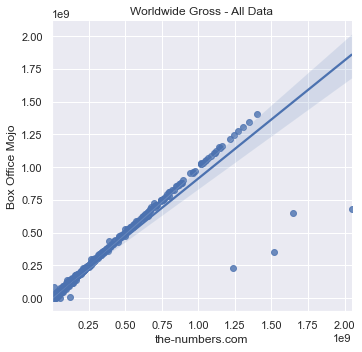

In [59]:
# Remove entries in imdb_basics where start_year > 2020
imdb_basics = imdb_basics[imdb_basics.start_year <= 2020]

# Remove entries in bom_gross where domestic_gross is null
bom_gross.dropna(axis = 0, subset = ['domestic_gross'], inplace = True)

# Convert foreign_gross to float, and calculate worldwide_gross
bom_gross.foreign_gross.replace({',':''}, regex=True, inplace = True)
bom_gross.foreign_gross = bom_gross.foreign_gross.astype(float)
bom_gross.foreign_gross.fillna(value = 0, inplace = True)
bom_gross['worldwide_gross'] = bom_gross.domestic_gross + bom_gross.foreign_gross
bom_gross = bom_gross.drop('foreign_gross', axis = 1)

# Remove text preventing conversion from string to float
TNbudgets.production_budget.replace({',':'', '\$':''}, regex=True, inplace = True)
TNbudgets.domestic_gross.replace({',':'', '\$':''}, regex=True, inplace = True)
TNbudgets.worldwide_gross.replace({',':'', '\$':''}, regex=True, inplace = True)

# Convert profit-related data from string to numerical data
TNbudgets.production_budget = TNbudgets.production_budget.astype(float)
TNbudgets.worldwide_gross = TNbudgets.worldwide_gross.astype(float)
TNbudgets.domestic_gross = TNbudgets.domestic_gross.astype(float)

# Extract year from TNbudgets release_date to distinguish movies with same title

def get_year_back(x) :
    return x.strip()[-4:]

TNbudgets['TN_year'] = TNbudgets.release_date.apply(get_year_back)
TNbudgets.TN_year = TNbudgets.TN_year.astype(int)
TNbudgets.drop('release_date', axis = 1, inplace = True)

# Merge imdb data with revenue information from TN
# Using inner join because TNbudgets is only source for production_budget to calculate net profits

revenue = pd.merge(imdb_basics, TNbudgets, left_on = ['primary_title', 'start_year'], 
                   right_on = ['movie', 'TN_year'], how = 'inner')
revenue = revenue.drop('movie', axis = 1)
revenue = revenue.drop('TN_year', axis = 1)

# Merge with revenue information from bom

revenue = pd.merge(revenue, bom_gross, left_on = ['primary_title', 'start_year'], 
                   right_on = ['title', 'year'], how = 'left', suffixes = ('_TN','_bom'))
revenue = revenue.drop('title', axis = 1)
revenue = revenue.drop('year', axis = 1)

# Compare worldwide gross profits from TN vs. bom

sns.set_theme(color_codes=True)
sns.lmplot(x='worldwide_gross_TN', y='worldwide_gross_bom', data=revenue) \
        .set(xlabel = 'the-numbers.com', ylabel = 'Box Office Mojo', 
             title = 'Worldwide Gross - All Data');

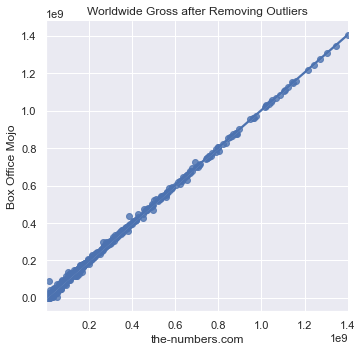

In [60]:
# Remove outliers in worldwide_gross and confirm
revenue = revenue[abs(revenue.worldwide_gross_TN - revenue.worldwide_gross_bom) < 10**8]
sns.lmplot(x='worldwide_gross_TN', y='worldwide_gross_bom', data=revenue) \
        .set(xlabel = 'the-numbers.com', ylabel = 'Box Office Mojo', 
             title = 'Worldwide Gross after Removing Outliers');

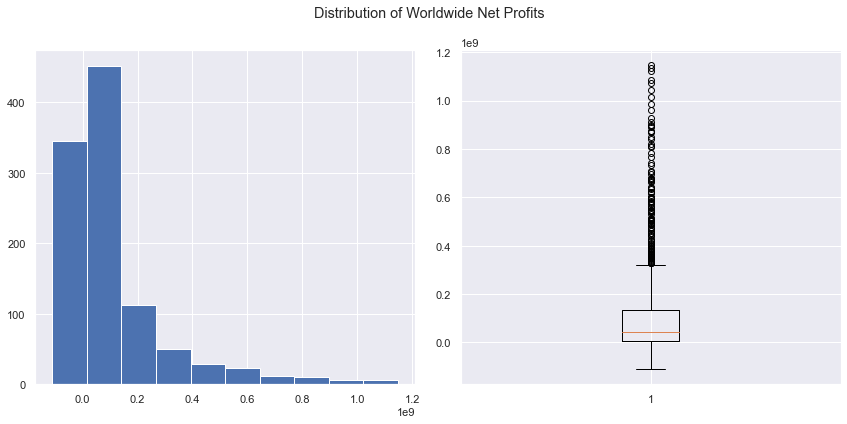

In [61]:
# Calculate net profits

revenue['worldwide_net'] = revenue.worldwide_gross_TN - revenue.production_budget
revenue['domestic_net'] = revenue.domestic_gross_TN - revenue.production_budget
revenue.drop(['domestic_gross_bom', 'worldwide_gross_bom', 'production_budget',
              'domestic_gross_TN', 'worldwide_gross_TN'], axis = 1, inplace = True)

# Show distribution of data
fig, [ax1, ax2] = plt.subplots(ncols = 2, nrows = 1, figsize=(12, 6))
plt.tight_layout()
st = fig.suptitle('Distribution of Worldwide Net Profits')
ax1.hist(revenue.worldwide_net)
ax2.boxplot(revenue.worldwide_net)
st.set_y(0.95)
fig.subplots_adjust(top=0.85);

### Remove outliers for purposes of defining successful movies

I am defining a successful movie as the upper quartile for profits and the upper quartile for ratings.  However, since extremely profitable (or unprofitable) movies will skew the data, I am removing profit outliers before determining the upper quartile values.  I will keep the original revenue database intact so that the outlier movies are still counted in the analysis. 

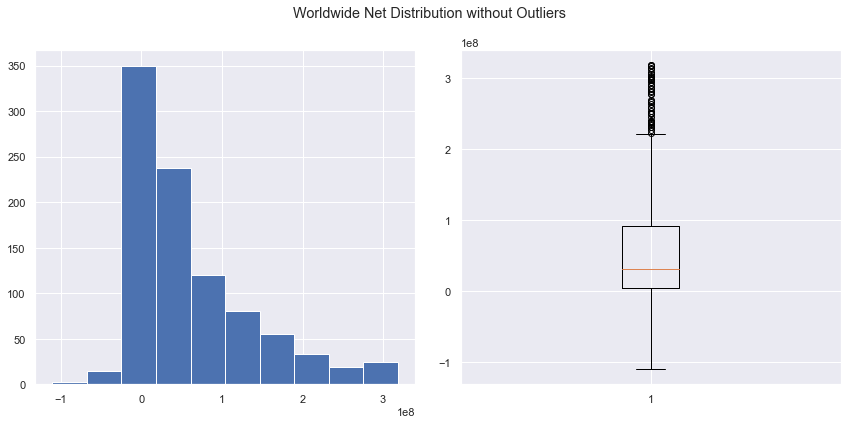

In [62]:
# Remove outliers and create range of worldwide revenues
# to define cutoff point between successful and unsuccessful movies

q1 = revenue.worldwide_net.quantile(0.25)
q3 = revenue.worldwide_net.quantile(0.75)
iqr = q3 - q1
worldwide_range = revenue.worldwide_net[((q1 - 1.5*iqr) <= revenue.worldwide_net) & 
                                        (revenue.worldwide_net <= (q3 + 1.5*iqr))]

fig, [ax1, ax2] = plt.subplots(ncols = 2, nrows = 1, figsize = (12,6))
plt.tight_layout()
st = fig.suptitle('Worldwide Net Distribution without Outliers')
ax1.hist(worldwide_range)
ax2.boxplot(worldwide_range)
st.set_y(0.95)
fig.subplots_adjust(top=0.85);

### Clean Ratings Data:

As noted above, imdb ratings data range between 1-10, Rotten Tomato ratings range between 0-100, and TheMovieDB ratings range between 0-10.  After standardizing the ratings so they all range between 0-10, I calculate the average rating over all databases.

In [63]:
imdb = pd.merge(imdb_basics, imdb_ratings, on = 'tconst', how = 'inner')
imdb.drop(['genres'], axis = 1, inplace = True)

# Standardize imdb ratings so they range from 0-10 rather than 1-10
imdb.averagerating = imdb.averagerating * 10/9 - 10/9
imdb.rename(columns={'averagerating':'imdb_rating', 'numvotes':'imdb_count'}, inplace = True)

# Standardize Rotten Tomato ratings so they range from 0-10 rather than 0-100
RTmovies.tomatometer_rating = RTmovies.tomatometer_rating / 10
RTmovies.audience_rating = RTmovies.audience_rating /10
RTmovies.rename(columns={'tomatometer_rating':'RT_rating','audience_rating':'RT_audience_rating',
                         'tomatometer_count':'RT_count', 'audience_count':'RT_audience_count'}, inplace = True)

# Remove null release dates in RTmovies
RTmovies.dropna(axis = 0, subset = ['original_release_date'], inplace = True)

# Remove entry where count is null but rating is not
RTmovies.drop(RTmovies[(RTmovies.RT_audience_count.isna()) & (RTmovies.RT_audience_rating.notnull())].index, 
              inplace = True)

# Rename TMDB ratings and count columns
TMDBmovies.rename(columns={'vote_average':'TMDB_rating', 'vote_count':'TMDB_count'}, inplace = True)

# Extract year from RTmovies release_date to distinguish movies with same title
def get_year_front(x) :
    return str(x).strip()[:4]
RTmovies['RT_year'] = RTmovies.original_release_date.apply(get_year_front)
RTmovies.RT_year = RTmovies.RT_year.astype(int)
RTmovies.drop('original_release_date', axis = 1, inplace=True)

# Extract year from TMDBmovies release_date to distinguish movies with same title
TMDBmovies['TMDB_year'] = TMDBmovies.release_date.apply(get_year_front)
TMDBmovies.TMDB_year = TMDBmovies.TMDB_year.astype(int)
TMDBmovies.drop('release_date', axis = 1, inplace = True)

# Remove multiple entries in TMDBmovies having same title/release_date
TMDBmovies = TMDBmovies.groupby(['title', 'TMDB_year']).agg({'TMDB_rating':'mean', 'TMDB_count':'sum'})

# Merge all imdb and RT ratings data and delete redundant columns
all_ratings = pd.merge(imdb, RTmovies, left_on = ['primary_title', 'start_year'], 
                       right_on = ['movie_title', 'RT_year'], how = 'left')
all_ratings.drop(['movie_title', 'RT_year'], axis = 1, inplace = True)

# Merge TMDB ratings data
all_ratings = pd.merge(all_ratings, TMDBmovies, left_on = ['primary_title', 'start_year'], 
                       right_on = ['title', 'TMDB_year'], how = 'left')

# Calculate average rating over all Movie Databases

# First replace all null ratings and count with "0"
all_ratings.RT_rating.fillna(value = 0, inplace = True)
all_ratings.RT_count.fillna(value = 0, inplace = True)
all_ratings.RT_audience_rating.fillna(value = 0, inplace = True)
all_ratings.RT_audience_count.fillna(value = 0, inplace = True)
all_ratings.TMDB_rating.fillna(value = 0, inplace = True)
all_ratings.TMDB_count.fillna(value = 0, inplace = True)

# Then calculate sum of all counts and sum of all ratings to calculate average total rating
all_ratings['total_count'] = (all_ratings.imdb_count
                             + all_ratings.RT_count 
                             + all_ratings.RT_audience_count 
                             + all_ratings.TMDB_count)
all_ratings['total_rating'] = ((all_ratings.imdb_rating * all_ratings.imdb_count) 
                              + (all_ratings.RT_rating * all_ratings.RT_count) 
                              + (all_ratings.RT_audience_rating * all_ratings.RT_audience_count) 
                              + (all_ratings.TMDB_rating * all_ratings.TMDB_count))
all_ratings.total_rating = all_ratings.total_rating / all_ratings.total_count

# Drop individual counts once sum totals are calculated
all_ratings.drop(['imdb_count', 'imdb_rating', 'RT_count', 'RT_rating', 'RT_audience_count', 'RT_audience_rating', 
                  'TMDB_count', 'TMDB_rating', 'total_count'], axis = 1, inplace = True)

# Drop columns from all_ratings that are included in revenue
all_ratings.drop(['primary_title', 'start_year'], axis = 1, inplace = True)

# Merge revenue and ratings data
all_data = pd.merge(revenue, all_ratings, on = 'tconst', how = 'inner')
print('Top Films by Revenue:')
all_data.sort_values(by='worldwide_net', ascending=False)

Top Films by Revenue:


,tconst,primary_title,start_year,genres,worldwide_net,domestic_net,total_rating
554,tt1825683,Black Panther,2018,"Action,Adventure,Sci-Fi",1.148258e+09,500059566.0,7.138791
966,tt4881806,Jurassic World: Fallen Kingdom,2018,"Action,Adventure,Sci-Fi",1.135773e+09,247719760.0,5.678187
701,tt2294629,Frozen,2013,"Adventure,Animation,Comedy",1.122470e+09,250738009.0,7.693758
699,tt2293640,Minions,2015,"Adventure,Animation,Comedy",1.086336e+09,262045770.0,5.563297
738,tt2395427,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",1.072414e+09,128405868.0,7.392075
...,...,...,...,...,...,...,...
103,tt1014763,Child 44,2015,"Crime,Drama,History",-4.199578e+07,-48775670.0,5.775314
786,tt2717822,Blackhat,2015,"Action,Crime,Thriller",-5.033500e+07,-61994020.0,4.177696
46,tt0790736,R.I.P.D.,2013,"Action,Adventure,Comedy",-5.092332e+07,-96381145.0,4.556395
115,tt1041804,The Nutcracker in 3D,2010,"Action,Family,Fantasy",-6.953398e+07,-89804541.0,3.721963


## Top Box Office Movies

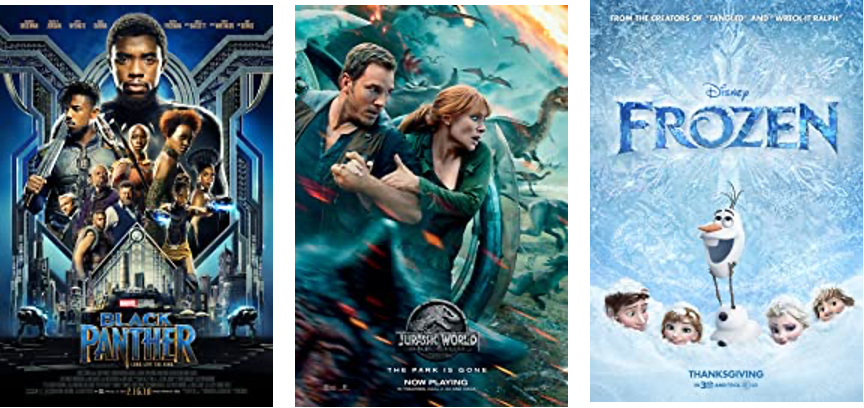

## Data Modeling
I plot worldwide net profits against the ratings to confirm that the two are related.  Then using the upper quartiles calculated above, I divided the data into four quadrants.  The upper right quadrant includes films that are both profitable and popular, while the lower left quadrant includes films that are the least profitable and least popular.  Within these quadrants, I compared not only the genre of the films, but also the primary principals (writers, producers, actors and actresses) involved with the film to identify any trends.

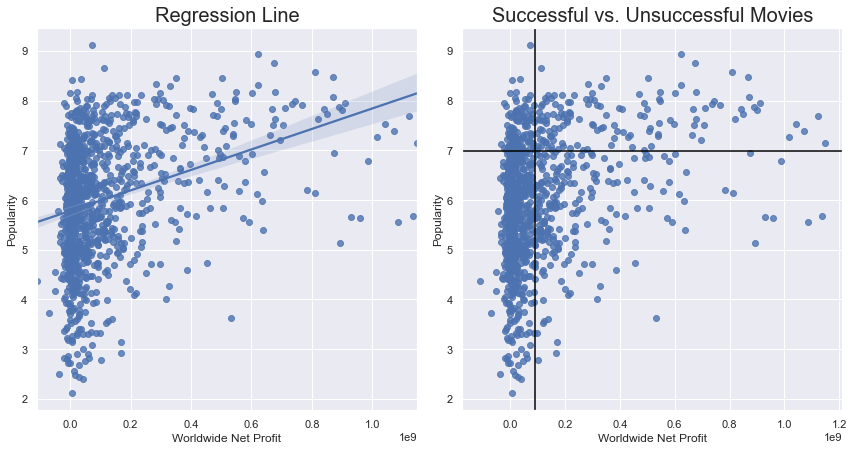

In [75]:
# Plot worldwide_net profit vs. total_rating with regression line

fig, [ax1, ax2] = plt.subplots(ncols = 2, nrows = 1, figsize=(12, 6))
plt.tight_layout()
g1 = sns.regplot(x='worldwide_net', y='total_rating', data=all_data, ax=ax1)
g2 = sns.regplot(x='worldwide_net', y='total_rating', data=all_data, ax=ax2, fit_reg=False)
g1.set_title('Regression Line', fontsize=20)
g2.set_title('Successful vs. Unsuccessful Movies', fontsize=20)
g1.xaxis.set_label_text('Worldwide Net Profit')
g1.yaxis.set_label_text('Popularity')
g2.xaxis.set_label_text('Worldwide Net Profit')
g2.yaxis.set_label_text('Popularity')
g2.axhline(all_data.total_rating.quantile(0.75), color = 'black')
g2.axvline(worldwide_range.quantile(0.75), color = 'black')
plt.savefig('images/quadrants')
plt.show();

### Comparing Genres

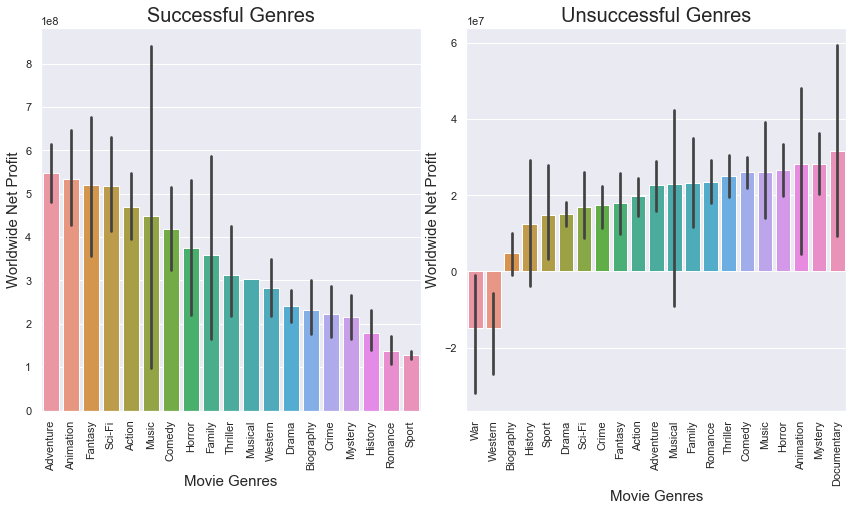

In [76]:
# IDENTIFY SUCCESSFUL MOVIE GENRES

# Select data in upper quantile
worldwide_success_dataa = all_data[(all_data.worldwide_net >= worldwide_range.quantile(0.75)) 
                                  & (all_data.total_rating >= all_data.total_rating.quantile(0.75))]

# Separate genres into their own rows
worldwide_success_genres = worldwide_success_data.assign \
    (genres = worldwide_success_data.genres.str.split(',')).explode('genres')

# Sort by mean worldwide_net to place bar graph in descending order
worldwide_success_sorted = worldwide_success_genres.groupby('genres').mean() \
                               .sort_values('worldwide_net', ascending = False)

# IDENTIFY UNSUCCESSFUL MOVIE GENRES

# Select data in lower quantile
worldwide_fail_data = all_data[(all_data.worldwide_net < worldwide_range.quantile(0.75)) 
                               & (all_data.total_rating < all_data.total_rating.quantile(0.75))]

# Separate genres into their own rows
worldwide_fail_genres = worldwide_fail_data.assign \
    (genres = worldwide_fail_data.genres.str.split(',')).explode('genres')

# Sort by mean worldwide_net to place bar graph in ascending order
worldwide_fail_sorted = worldwide_fail_genres.groupby('genres').mean().sort_values('worldwide_net')

fig, [ax1, ax2] = plt.subplots(ncols = 2, nrows = 1, figsize=(12, 6))
plt.tight_layout()
# st = fig.suptitle('Distribution of Worldwide Net Profits')
g1 = sns.barplot(x = 'genres', y = 'worldwide_net', data = worldwide_success_genres, 
            order = worldwide_success_sorted.index, ax=ax1)
g2 = sns.barplot(x = 'genres', y = 'worldwide_net', data = worldwide_fail_genres, 
                    order = worldwide_fail_sorted.index, ax=ax2)
g1.set_title('Successful Genres', fontsize=20)
g2.set_title('Unsuccessful Genres', fontsize=20)
g1.xaxis.set_label_text('Movie Genres', fontsize=15)
g1.yaxis.set_label_text('Worldwide Net Profit', fontsize=15)
g2.xaxis.set_label_text('Movie Genres', fontsize=15)
g2.yaxis.set_label_text('Worldwide Net Profit', fontsize=15)
g1.set_xticklabels(labels=worldwide_success_sorted.index, rotation=90)
g2.set_xticklabels(labels=worldwide_fail_sorted.index, rotation=90)
plt.savefig('images/genres')
plt.show();

### Comparing Movie Principals

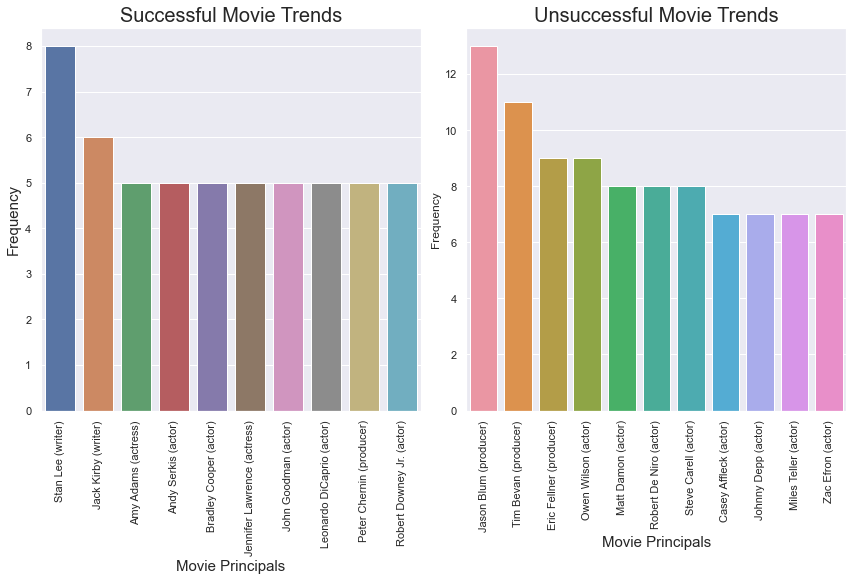

In [77]:
# Add principal names and category to movies
success_principals = pd.merge(worldwide_success_data, imdb_principals[['tconst', 'nconst', 'category']], 
                                on='tconst', how='left')
success_principals = pd.merge(success_principals, imdb_name[['nconst', 'primary_name']], 
                                on='nconst', how='left')
fail_principals = pd.merge(worldwide_fail_data, imdb_principals[['tconst', 'nconst', 'category']], 
                                on='tconst', how='left')
fail_principals = pd.merge(fail_principals, imdb_name[['nconst', 'primary_name']], 
                                on='nconst', how='left')

# Calculate frequency of occurrences for each principal
top_principals = success_principals.groupby(['primary_name', 'category']) \
        .primary_name.agg('count').to_frame('freq').reset_index()
bottom_principals = fail_principals.groupby(['primary_name', 'category']) \
        .primary_name.agg('count').to_frame('freq').reset_index()

# Remove 'composers' from list of bottom_principals
bottom_principals = bottom_principals[bottom_principals.category != 'composer']

# Keep principals with at least five occurrences in dataset
top_principals = top_principals[top_principals.freq >= 5]
top_principals.sort_values(by='freq', ascending=False, inplace = True)

# Unsuccessful films have mor principals in common, so cutoff will be increased to 7
# Keep principals with at least seven occurrences in dataset
bottom_principals = bottom_principals[bottom_principals.freq >= 7]
bottom_principals.sort_values(by='freq', ascending=False, inplace = True)

# Format information to display name and category of principal
top_principals.category = ' (' + top_principals.category + ')'
top_principals.primary_name = top_principals.primary_name + top_principals.category
bottom_principals.category = ' (' + bottom_principals.category + ')'
bottom_principals.primary_name = bottom_principals.primary_name + bottom_principals.category


# Display principals with highest occurrences in successful movies

fig, [ax1, ax2] = plt.subplots(ncols = 2, nrows = 1, figsize=(12, 6))
plt.tight_layout()
# st = fig.suptitle('Distribution of Worldwide Net Profits')
g1 = sns.barplot(x = 'primary_name', y = 'freq', data = top_principals, ax=ax1)
g2 = sns.barplot(x = 'primary_name', y = 'freq', data = bottom_principals, ax=ax2)
g1.set_title('Successful Movie Trends', fontsize=20)
g2.set_title('Unsuccessful Movie Trends', fontsize=20)
g1.xaxis.set_label_text('Movie Principals', fontsize=15)
g1.yaxis.set_label_text('Frequency', fontsize=15)
g2.xaxis.set_label_text('Movie Principals', fontsize=15)
g2.yaxis.set_label_text('Frequency')
g1.set_xticklabels(labels=top_principals.primary_name, rotation=90)
g2.set_xticklabels(labels=bottom_principals.primary_name, rotation=90)
plt.savefig('images/principals')
plt.show();

## Evaluation
Because there is no overlap in the categories above between the successful movies and the unsuccessful movies, the results provide useful trends in the data.

Based on my analysis, the five most successful movie genres are:
 - Adventure
 - Animation
 - Fantasy
 - Sci-Fi
 - Action

The five least successful movie genres are:
- War
- Western
- Biography
- History
- Sport

I suggest that Microsoft focus on the top five genres, and avoid the bottom five.

The top writers are:
- Stan Lee
- Jack Kirby

The top actors/actresses are:
 - Amy Adams
 - Andy Serkis
 - Bradley Cooper
 - Jennifer Lawrence
 - John Goodman
 - Leonardo DiCaprio
 - Robert Downey Jr
 
The top producer is:
 - Peter Chermin

To the extent that it can afford these writers, producers, and actors/actresses, Microsoft should consider hiring them as they appear to be the most successful, and the data suggests that they would be the safest bets.  Similarly, I would avoid the following individuals who have been less successful:

Producers:
 - Jason Blum
 - Tim Bevan
 - Eric Fellner
 
Actors:
 - Owen Wilson
 - Matt Damon
 - Robert De Niro
 - Steve Carell
 - Casey Affleck
 - Johnny Depp
 - Miles Teller
 - Zac Efron

There’s no formula for a successful film per se.  But because Microsoft is less familiar with this industry, the value of this data is to provide it with some level of foundational knowledge and a data driven understanding of what is more likely to lead to success based on past performance.

## Conclusions
I provide the following three recommendations to Microsoft:
 - Focus on the following five movie genres: Adventure, Animation, Fantasy, Sci-Fi and Action.
 - Avoid the following five movie genres: War, Western, Biography, History and Sport.
 - If possible, hire Stan Lee or Jack Kirby to write the movie script, hire Peter Chermin to produce the movie, and include one or more of the following actors/actresses: Amy Adams, Andy Serkis, Bradley Cooper, Jennifer Lawrence, John Goodman, Leonardo DiCaprio, Robert Downey Jr.
 
### Next Steps
 - A number of the films relate to multiple genres.  For example, of the top five films by revenue, three were Action, Adventure and Sci-Fi while the other two were Adventure, Animation and Comedy.  I recommend we further analyze the films based on groups of genres rather than looking at them individually.
 - Similarly, I recommend we further analyze the films based on the different groups of principals that were involved with each film.
 - Finally, if Microsoft has a specific budget in mind, we can analyze all of the films within Microsoft's budget to determine what trends exist within those movies specifically
